In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Importing dataset - the generated simulator data
data = pd.read_csv('./data/metrics.csv', delimiter=",")
data.head()

,Unnamed: 0,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Power,PowerConsumption,ContentType,O2,CO2,Time_Door_Open,Maintenance_Required,Defrost_Cycle
0,0,2019-09-04 T15:31 Z,101,4.470475,4,14.490263,16.642944,3,26.764242,4.399405,32.833310,0,2
1,1,2019-09-04 T15:46 Z,101,6.432356,4,13.685369,30.328313,3,19.054393,3.592162,32.082549,0,5
2,2,2019-09-04 T16:01 Z,101,4.382502,4,7.872927,38.201240,3,16.766289,4.586092,32.059170,0,2
3,3,2019-09-04 T16:16 Z,101,4.150252,4,10.589863,48.791103,3,25.604127,2.427279,34.829726,0,5
4,4,2019-09-04 T16:31 Z,101,6.647281,4,5.910298,54.701401,3,18.399625,-1.437193,28.962721,0,3


In [3]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['Temperature(celsius)','Target_Temperature(celsius)','Power','PowerConsumption','ContentType','O2','CO2','Time_Door_Open','Defrost_Cycle']])
X[0:5]

array([[ 4.47047541,  4.        , 14.49026261, 16.6429438 ,  3.        ,
        26.76424173,  4.39940454, 32.83331025,  2.        ],
       [ 6.43235563,  4.        , 13.68536931, 30.32831311,  3.        ,
        19.05439306,  3.59216173, 32.08254871,  5.        ],
       [ 4.38250182,  4.        ,  7.87292727, 38.20124038,  3.        ,
        16.76628908,  4.58609188, 32.05917021,  2.        ],
       [ 4.15025193,  4.        , 10.58986264, 48.79110303,  3.        ,
        25.60412713,  2.42727884, 34.82972619,  5.        ],
       [ 6.64728075,  4.        ,  5.91029756, 54.70140059,  3.        ,
        18.39962478, -1.43719338, 28.96272144,  3.        ]])

In [4]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['Maintenance_Required'])
#y = np.asarray(data['Maintainence_Required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [5]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.07461925,  0.        ,  1.45342527, -0.77510426,  1.        ,
         1.91177434,  0.12232963,  1.4047263 , -0.50280399],
       [ 0.31835587,  0.        ,  1.31766167, -0.77315237,  1.        ,
        -0.63418464, -0.14240993,  1.02707857,  0.97917927],
       [ 0.06368975,  0.        ,  0.3372608 , -0.77202948,  1.        ,
        -1.38976613,  0.18355473,  1.01531872, -0.50280399],
       [ 0.03483589,  0.        ,  0.79553389, -0.77051909,  1.        ,
         1.52867938, -0.52443946,  2.40896253,  0.97917927],
       [ 0.34505736,  0.        ,  0.00621856, -0.76967612,  1.        ,
        -0.85040331, -1.79181362, -0.54225552, -0.00880957]])

In [6]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4800, 9) (4800,)
Test set: (1200, 9) (1200,)


In [7]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
LR.coef_

array([[ 0.49127071,  0.        , -0.05559321,  0.20520584, -1.47016667,
         0.04505345,  0.66071417, -0.02051192,  0.0688468 ]])

In [9]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 0, 0])

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.427394  , 0.572606  ],
       [0.95399906, 0.04600094],
       [0.9807541 , 0.0192459 ],
       ...,
       [0.33382952, 0.66617048],
       [0.8951778 , 0.1048222 ],
       [0.97282964, 0.02717036]])

In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.5980582524271845

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[308  95]
 [112 685]]
[[308  95]
 [112 685]]


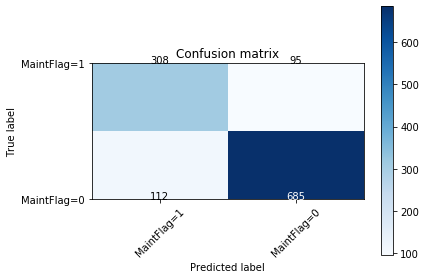

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [14]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       797
           1       0.73      0.76      0.75       403

    accuracy                           0.83      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.83      0.83      0.83      1200



In [15]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.40842692093593447

In [16]:
import pickle

#serializing our model to a file called model_logistic_regression.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))